In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sbs

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unicorn-companies-dataset/Unicorn_Companies.csv


In [17]:
# Task 1: Percentage top 10 Industry in with Pie chart
# Task 2: Top 10 investors by average invest company value which they have invested in 
# Task 3: Which cities are hosting most valuable companies
df = pd.read_csv("../input/unicorn-companies-dataset/Unicorn_Companies.csv")
df.head()
float(str(df.loc[1, "Valuation ($B)"]).strip("$"))

100.3

In [18]:
# First checking if my dataframe is clean and cleaning it
df.isna().sum(), df.duplicated().sum()

(Company              0
 Valuation ($B)       0
 Date Joined          0
 Country              0
 City                 0
 Industry             0
 Select Inverstors    0
 Founded Year         0
 Total Raised         0
 Financial Stage      0
 Investors Count      0
 Deal Terms           0
 Portfolio Exits      0
 dtype: int64,
 0)

In [19]:
df.loc[48]["Industry"] = "Fintech"

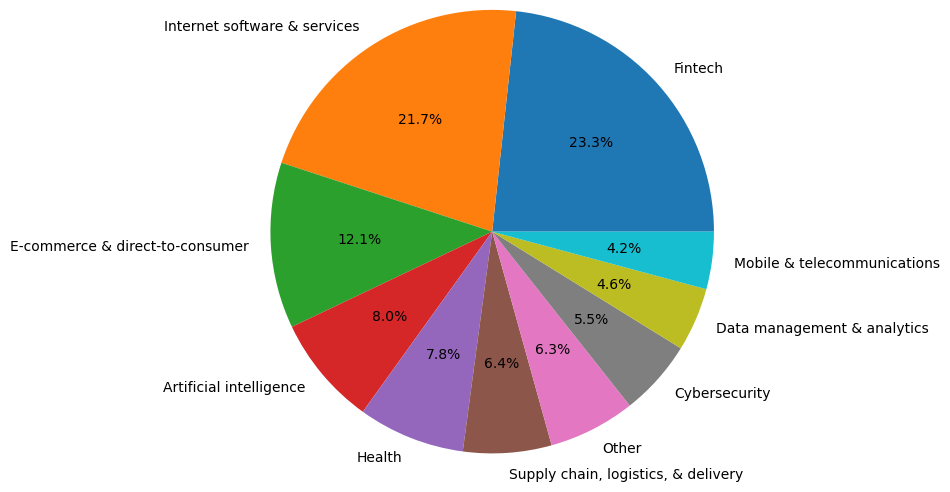

In [52]:
# Answer 1
pie_data = df.groupby('Industry')["Company"].count().sort_values(ascending=False).head(10)
plt.pie(pie_data, radius=1.5, labels=pie_data.index,  autopct='%1.1f%%')
plt.show()

In [21]:
# Answer 2
investors_df = pd.DataFrame()
temp_investors_list = [i.strip() for index, column in df.iterrows() for i in column["Select Inverstors"].split(",")]
investors_list = np.unique(temp_investors_list)
investors_df["Investors"] = investors_list
investors_df.drop([0, 2], inplace=True)
investors_df.reset_index(drop=True, inplace=True)
investors_df["Company Count"] = 0
investors_df["Total Invested Company Value($B)"] = 0
investors_df["Average Company Value($B)"] = 0
investors_df

,Investors,Company Count,Total Invested Company Value($B),Average Company Value($B)
0,.406 Ventures,0,0,0
1,01 Advisors,0,0,0
2,10T Fund,0,0,0
3,14W,0,0,0
4,14W. ForgeLight,0,0,0
...,...,...,...,...
1211,iTech Capital,0,0,0
1212,iVision Ventures,0,0,0
1213,index Ventures,0,0,0
1214,next47,0,0,0


In [22]:
for index1, column1 in df.iterrows():
    for index2, column2 in investors_df.iterrows():
        for i in column1["Select Inverstors"].split(","):
            if i.strip() == column2["Investors"]:
                investors_df.loc[index2 ,"Company Count"] += 1
                investors_df.loc[index2 ,"Total Invested Company Value($B)"] += float(str(df.loc[index1, "Valuation ($B)"]).strip("$"))

In [23]:
investors_df["Average Company Value($B)"] = investors_df["Total Invested Company Value($B)"] / investors_df["Company Count"]
plot_data =  investors_df.sort_values(by="Average Company Value($B)", ascending=False).head(10)

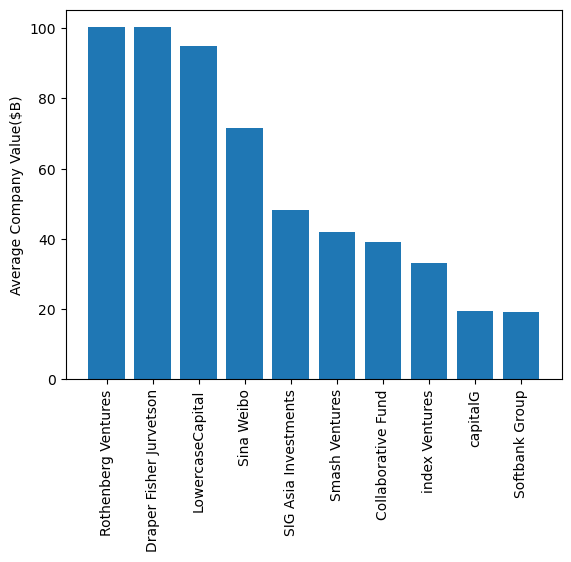

In [54]:
plt.bar(plot_data["Investors"], plot_data['Average Company Value($B)'])
plt.xticks(rotation=90)
plt.ylabel("Average Company Value($B)")
plt.show()

<Axes: xlabel='City', ylabel='Total Company Value($B)'>

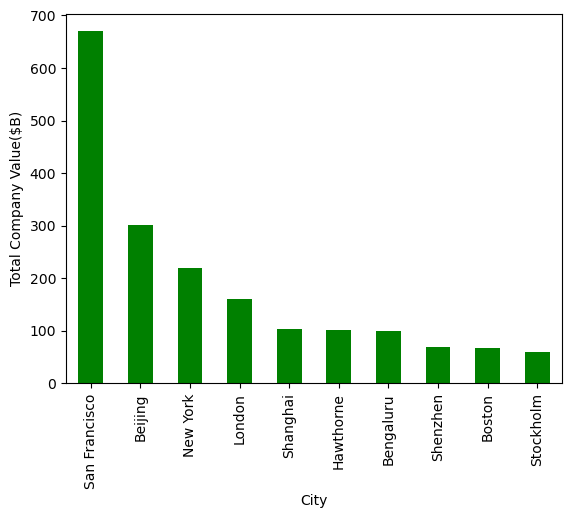

In [79]:
# Answer3
df["ValuationClean"] = df["Valuation ($B)"].apply(lambda x: float(str(x).strip("$")))
bar_graph = df.groupby(by="City")["ValuationClean"].sum().sort_values(ascending=False).head(10)
bar_graph.plot(kind="bar", ylabel="Total Company Value($B)", color="green")